## Writing the Functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
all_ratios = pd.read_csv('all_ratios.csv')
all_ratios = all_ratios.drop(columns=['Unnamed: 0'])
all_ratios.head()

,ReportDate,Representative,Ticker,TransactionDate,Amount,Delta,Ratio
0,2018-10-13,Rodney Leland Blum,ENB,2018-09-18,100001.0,50000.0,2.000020
1,2019-01-08,Rodney Leland Blum,MO,2018-12-17,100001.0,50000.0,2.000020
2,2023-06-06,Jonathan Jackson,HON,2023-05-01,50001.0,35000.0,1.428600
3,2018-12-17,Paul Mitchell Iii,SU,2018-12-17,100001.0,85000.0,1.176482
4,2018-12-12,Paul Mitchell Iii,SJM,2018-12-12,100001.0,85000.0,1.176482


#### The permutation function takes in the congress dataframe and returns a new dataframe with random purchases assigned to congressmen.

In [19]:
def permutation(df):
    permi=df.copy()
    df2=df.drop(['Representative', 'Rank'],axis=1)
    columns=['ReportDate','TransactionDate','Ticker','Amount','Delta','Ratio']
    permi[columns]=pd.DataFrame(np.random.permutation(df2))
    return permi

#### Permutations for the amount/delta ratio rank

In [21]:
all_ratios['Rank'] = all_ratios['Ratio'].rank(ascending=False)

# permute the data, so that the rank and ratio is random for each row 
all_ratios_new = permutation(all_ratios)
all_ratios_new['Rank'] = all_ratios_new['Ratio'].rank(ascending=False)

# show difference  
all_ratios.head()


,ReportDate,Representative,Ticker,TransactionDate,Amount,Delta,Ratio,Rank
0,2018-10-13,Rodney Leland Blum,ENB,2018-09-18,100001.0,50000.0,2.000020,1.5
1,2019-01-08,Rodney Leland Blum,MO,2018-12-17,100001.0,50000.0,2.000020,1.5
2,2023-06-06,Jonathan Jackson,HON,2023-05-01,50001.0,35000.0,1.428600,3.0
3,2018-12-17,Paul Mitchell Iii,SU,2018-12-17,100001.0,85000.0,1.176482,4.5
4,2018-12-12,Paul Mitchell Iii,SJM,2018-12-12,100001.0,85000.0,1.176482,4.5


In [22]:
all_ratios_new.sort_values(by=['Ratio'], ascending=False).head()

,ReportDate,Representative,Ticker,TransactionDate,Amount,Delta,Ratio,Rank
10088,2018-10-13,Kevin Hern,2018-09-18,ENB,100001.0,50000.0,2.00002,1.5
7056,2019-01-08,John Rutherford,2018-12-17,MO,100001.0,50000.0,2.00002,1.5
7369,2023-06-06,Katherine M. Clark,2023-05-01,HON,50001.0,35000.0,1.4286,3.0
7415,2018-12-12,Katherine M. Clark,2018-12-12,SJM,100001.0,85000.0,1.176482,4.5
8296,2018-12-17,Susie Lee,2018-12-17,SU,100001.0,85000.0,1.176482,4.5


In [23]:
representative_average_rank = {}
def representative_rank(df):
    #  create a random permutation of the data and store representative as the key, and the rank as the value
    for i in range(1000):
        all_ratios_new = permutation(df)
        all_ratios_new['Rank'] = all_ratios_new['Ratio'].rank(ascending=False)
        for index, row in all_ratios_new.iterrows():
            if row['Representative'] in representative_average_rank:
                representative_average_rank[row['Representative']].append(row['Rank'])
            else:
                representative_average_rank[row['Representative']] = [row['Rank']]

# take the average of the rank for each representative
representative_rank(all_ratios)

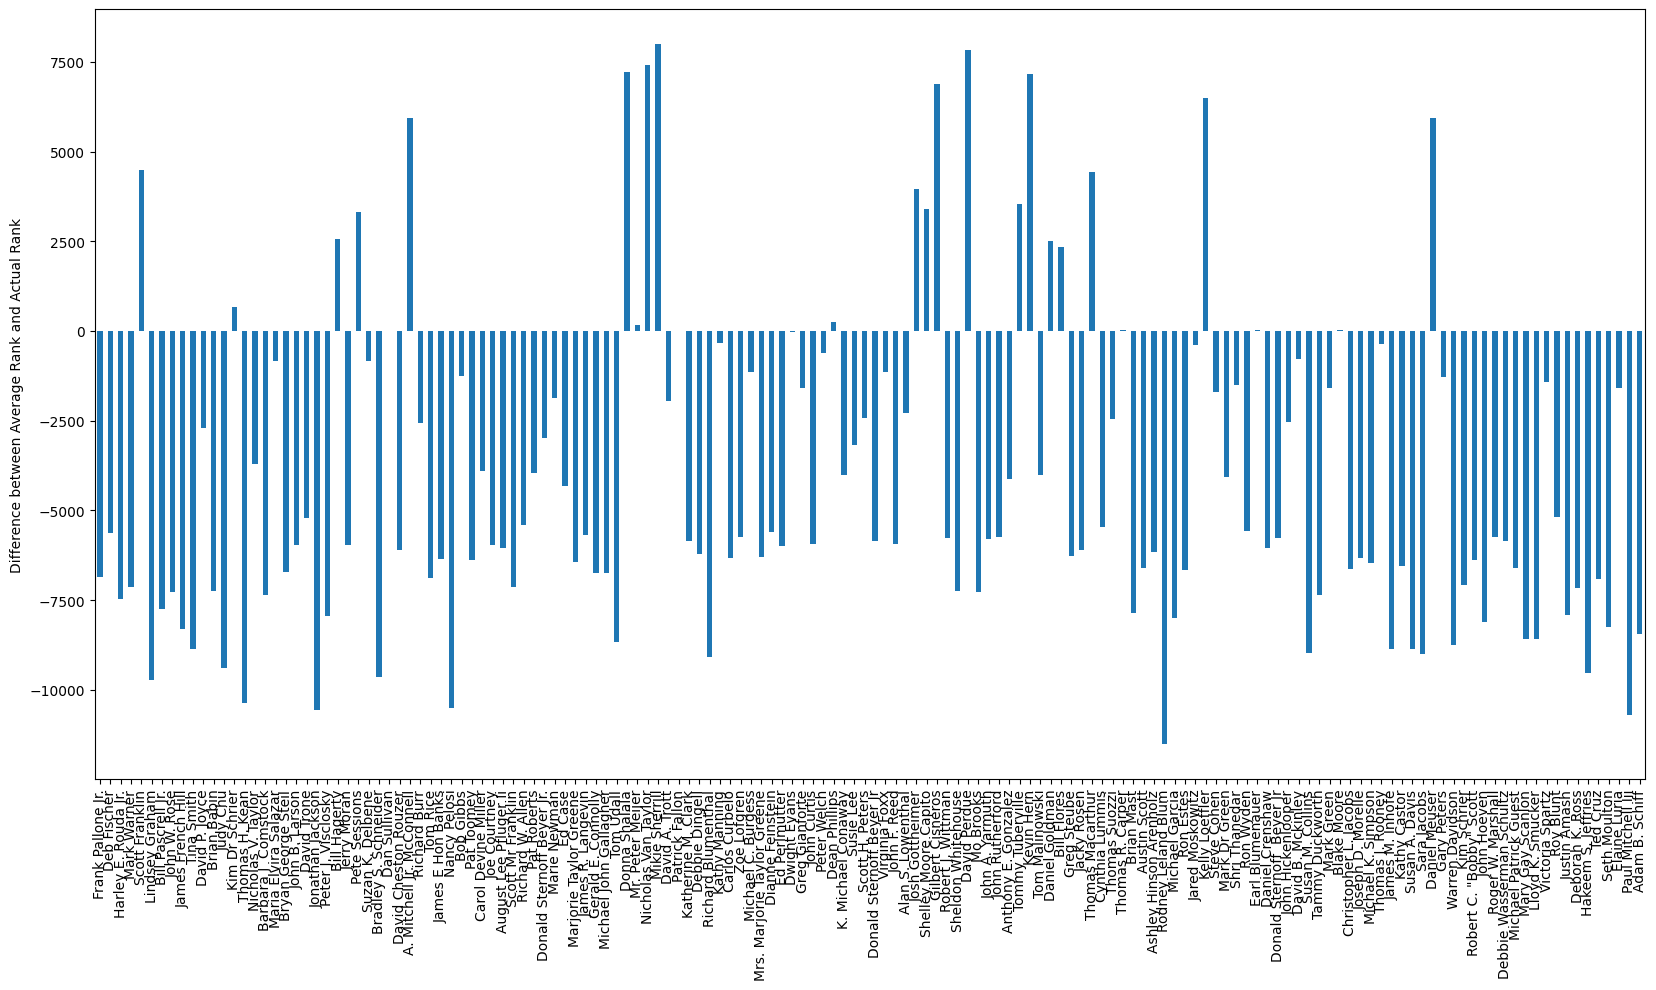

In [25]:
# for each of the representatives, take the average of the rank, and compare to their actual rank from all_ratios
representative_average_ranks = {k: np.mean(v) for k, v in representative_average_rank.items()}
representative_average_ranks = pd.DataFrame.from_dict(representative_average_ranks, orient='index', columns=['Average Rank'])
representative_average_ranks = representative_average_ranks.sort_values(by=['Average Rank'], ascending=False)

representative_average_ranks['Actual Rank'] = all_ratios.groupby('Representative')['Rank'].mean()

representative_average_ranks['Difference'] = representative_average_ranks['Actual Rank'] - representative_average_ranks['Average Rank']

# plot the difference between the average rank and the actual rank
representative_average_ranks['Difference'].plot(kind='bar', figsize=(20,10))
plt.ylabel('Difference between Average Rank and Actual Rank')
plt.show()


In [26]:
# give only positive differences 
representative_rank_difference = representative_average_ranks[representative_average_ranks['Difference'] > 0]

In [27]:
representative_rank_difference

,Average Rank,Actual Rank,Difference
Scott Franklin,11874.355441,16371.441176,4497.085735
Kim Dr Schrier,11837.007839,12523.053571,686.045732
Bill Hagerty,11799.791810,14358.714286,2558.922476
Pete Sessions,11797.606619,15131.991150,3334.384531
A. Mitchell Jr. McConnell,11791.250619,17737.976190,5946.725571
Donna Shalala,11774.379502,18985.327731,7210.948229
Mr. Peter Meijer,11773.631091,11955.404564,181.773473
Nicholas Van Taylor,11771.899142,19194.561377,7422.662235
Mikie Sherrill,11771.894469,19772.328185,8000.433716
Patrick Fallon,11770.759314,11775.947619,5.188305


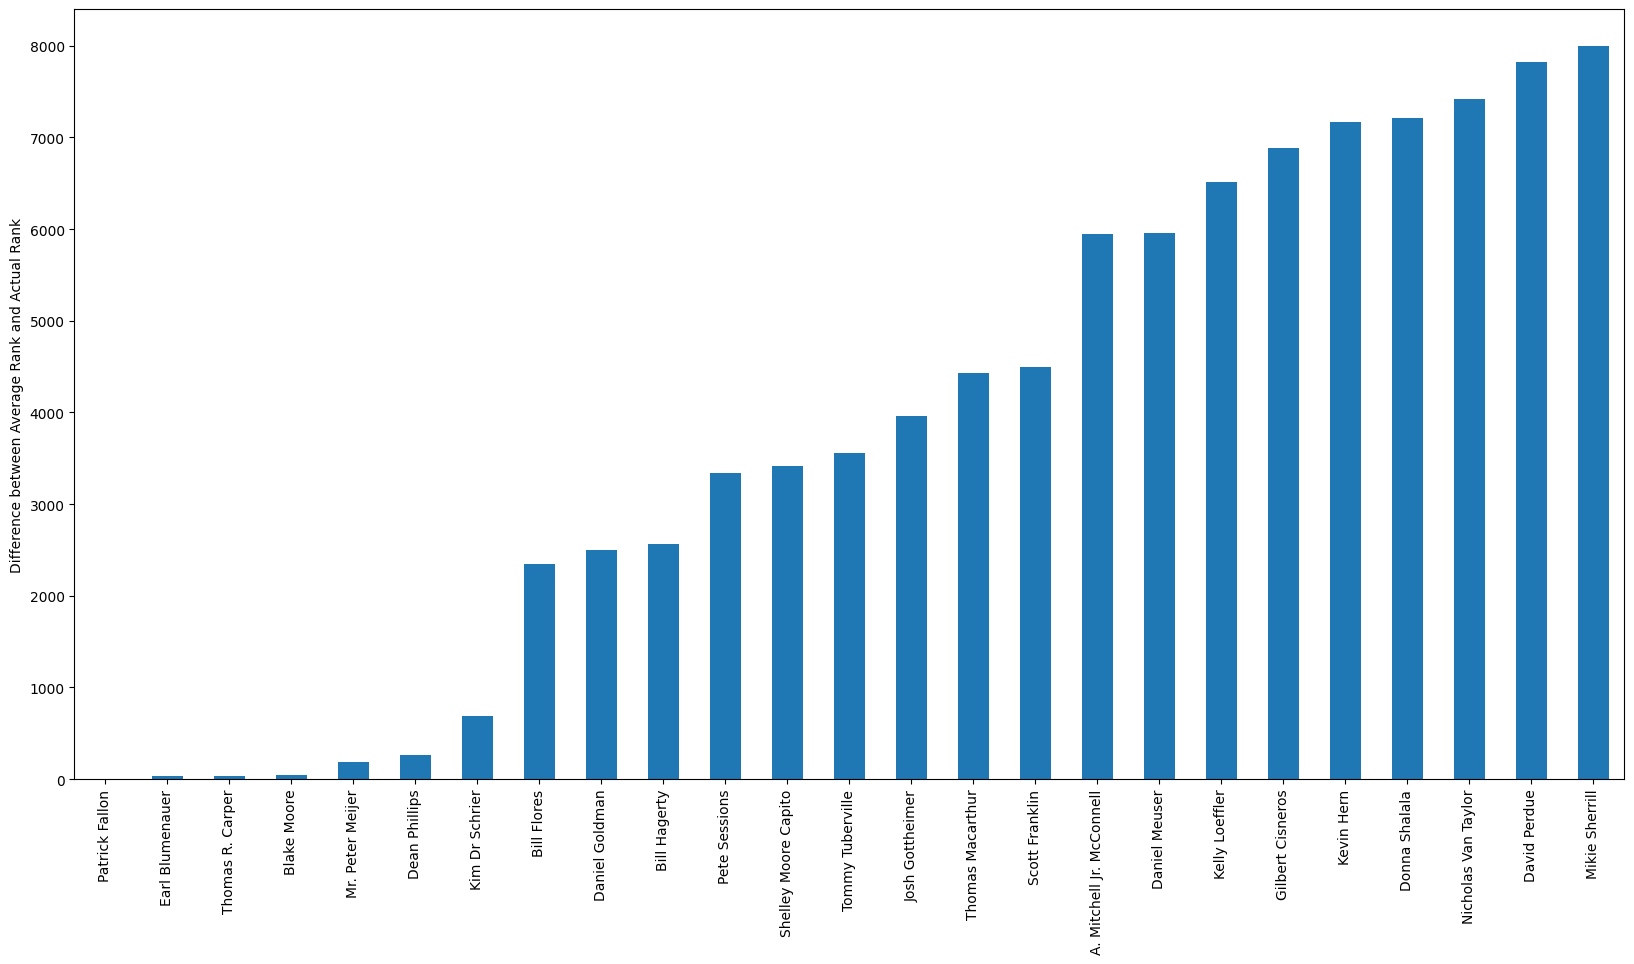

In [49]:
#plot highest differences
representative_rank_difference['Difference'].sort_values().plot(kind='bar', figsize=(20,10))
plt.ylabel('Difference between Average Rank and Actual Rank')
plt.show()


In [30]:
# create  a distirbution of the  the rank for each representative
# create a distribution of the rank for each representative
actual_rank = {}
for index, row in all_ratios.iterrows():
    if row['Representative'] in actual_rank:
        actual_rank[row['Representative']].append(row['Rank'])
    else:
        actual_rank[row['Representative']] = [row['Rank']]
actual_rank

{'Rodney Leland Blum': [1.5, 1.5, 697.0],
 'Jonathan Jackson': [3.0,
  1315.5,
  1315.5,
  1315.5,
  1315.5,
  1315.5,
  1315.5,
  1315.5,
  1315.5,
  1315.5,
  1315.5,
  1315.5,
  1315.5,
  1315.5,
  1315.5,
  1315.5,
  1315.5,
  1315.5,
  1315.5,
  1315.5,
  1315.5,
  1315.5,
  1315.5],
 'Paul Mitchell Iii': [4.5, 4.5, 2652.0],
 'Mo Brooks': [163.5,
  163.5,
  163.5,
  163.5,
  163.5,
  163.5,
  163.5,
  163.5,
  163.5,
  163.5,
  163.5,
  163.5,
  163.5,
  163.5,
  163.5,
  6079.5,
  6079.5,
  6079.5,
  6079.5,
  6079.5,
  6079.5,
  6079.5,
  6079.5,
  6079.5,
  6079.5,
  6079.5,
  6079.5,
  6079.5,
  6079.5,
  6079.5,
  6079.5,
  6079.5,
  6079.5,
  6079.5,
  6079.5,
  6079.5,
  6079.5,
  6079.5,
  6079.5,
  6079.5,
  6079.5,
  6079.5,
  6079.5,
  6079.5,
  6079.5,
  6079.5,
  6079.5,
  6079.5,
  6079.5,
  6079.5,
  6079.5,
  6079.5,
  6079.5,
  6079.5,
  6079.5,
  6079.5],
 'Susan M. Collins': [163.5,
  163.5,
  163.5,
  163.5,
  163.5,
  163.5,
  163.5,
  163.5,
  163.5,
  163.5,

In [31]:
# find std and mean of the distribution for each
representative_std = {}
representative_mean = {}
for key, value in actual_rank.items():
    representative_std[key] = np.std(value)
    representative_mean[key] = np.mean(value)

representative_std = pd.DataFrame.from_dict(representative_std, orient='index', columns=['Std'])
representative_mean = pd.DataFrame.from_dict(representative_mean, orient='index', columns=['Mean'])

# create a dataframe with the std and mean for each representative
new_df = pd.concat([representative_std, representative_mean], axis=1)
new_df


,Std,Mean
Rodney Leland Blum,327.861844,233.333333
Jonathan Jackson,267.659595,1258.434783
Paul Mitchell Iii,1248.043469,887.000000
Mo Brooks,2619.857660,4494.857143
Susan M. Collins,2935.921769,2760.768293
...,...,...
Bill Hagerty,7320.918288,14358.714286
Scott Franklin,7240.223556,16371.441176
Suzan K. Delbene,9922.528943,10962.333333
Kelly Loeffler,5019.216613,18254.892442


In [39]:
representative_z_score = {}

for key, value in actual_rank.items():
    representative_z_score[key] = [(i-new_df.loc[key]['Mean'])/new_df.loc[key]['Std'] for i in value]
representative_z_score

{'Rodney Leland Blum': [-0.7071067811865476,
  -0.7071067811865476,
  1.414213562373095],
 'Jonathan Jackson': [-4.690415759823431,
  0.21320071635561016,
  0.21320071635561016,
  0.21320071635561016,
  0.21320071635561016,
  0.21320071635561016,
  0.21320071635561016,
  0.21320071635561016,
  0.21320071635561016,
  0.21320071635561016,
  0.21320071635561016,
  0.21320071635561016,
  0.21320071635561016,
  0.21320071635561016,
  0.21320071635561016,
  0.21320071635561016,
  0.21320071635561016,
  0.21320071635561016,
  0.21320071635561016,
  0.21320071635561016,
  0.21320071635561016,
  0.21320071635561016,
  0.21320071635561016],
 'Paul Mitchell Iii': [-0.7071067811865476,
  -0.7071067811865476,
  1.4142135623730951],
 'Mo Brooks': [-1.6532795690182993,
  -1.6532795690182993,
  -1.6532795690182993,
  -1.6532795690182993,
  -1.6532795690182993,
  -1.6532795690182993,
  -1.6532795690182993,
  -1.6532795690182993,
  -1.6532795690182993,
  -1.6532795690182993,
  -1.6532795690182993,
  -1.

In [44]:
# find highest 10% of  z scores
representative_z_score_top = {}
for key, value in representative_z_score.items():
    representative_z_score_top[key] = [i for i in value if i > 1.28]

# if the value is not an empty array, keep, if not drop
representative_z_score_top = {k: v for k, v in representative_z_score_top.items() if v != []}



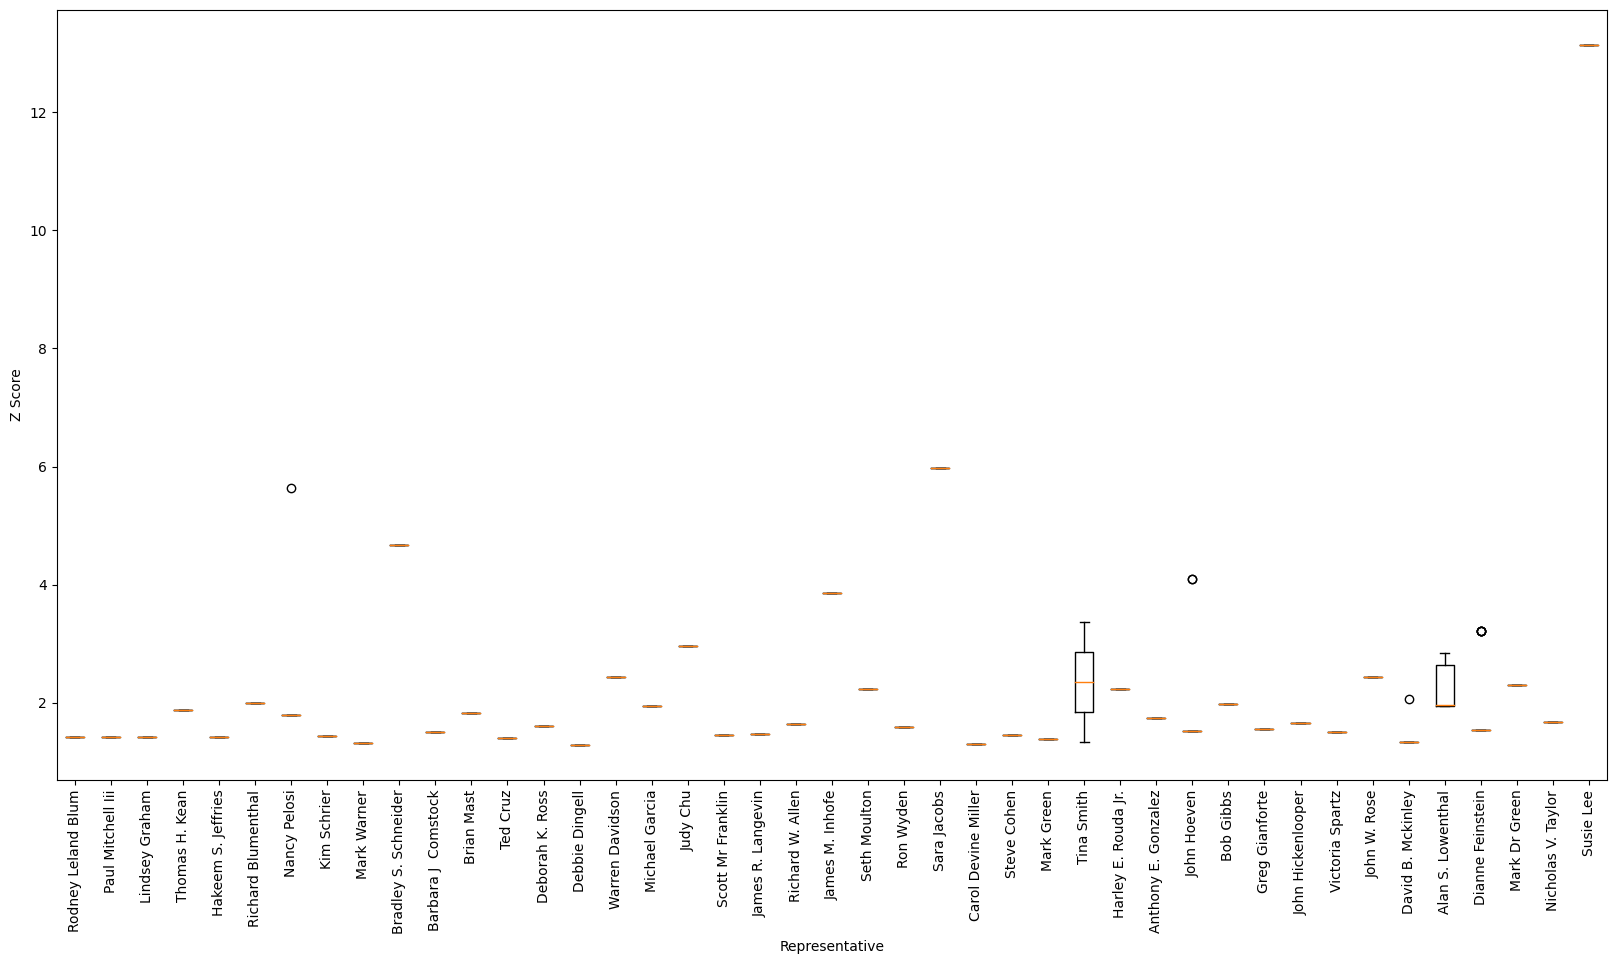

In [46]:

# plot these values
plt.figure(figsize=(20,10))
plt.boxplot(representative_z_score_top.values())
plt.xticks(range(1, len(representative_z_score_top.keys()) + 1), representative_z_score_top.keys())
plt.xlabel('Representative')
#tilt labels 90 degrees
plt.xticks(rotation=90)
plt.ylabel('Z Score')
plt.show()

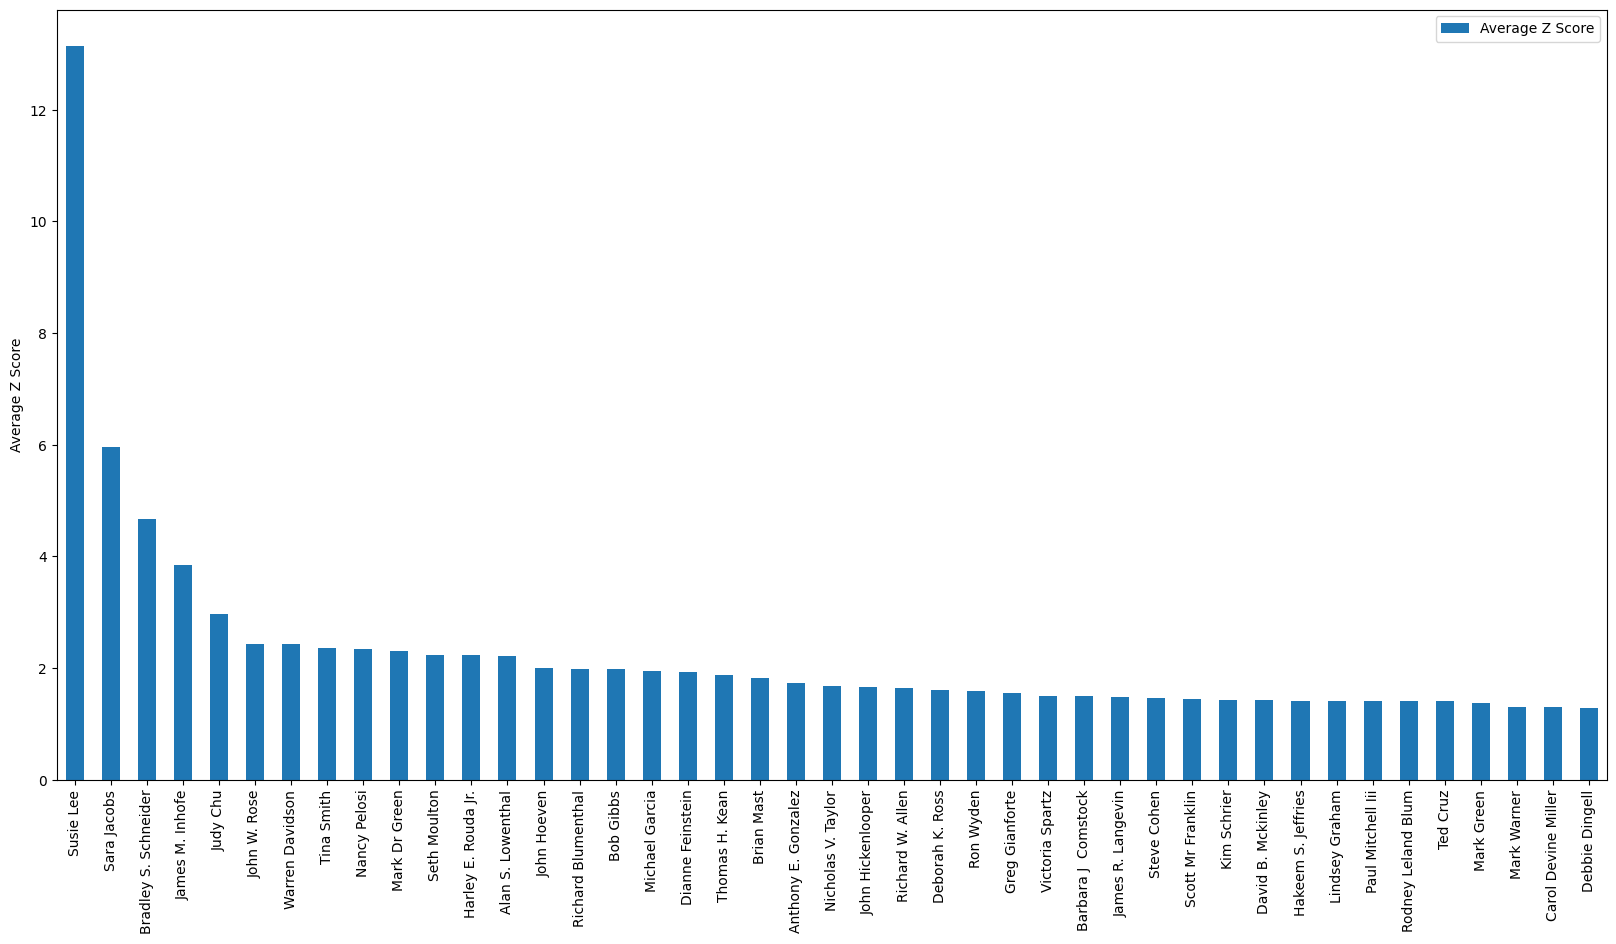

In [47]:
# find the average z score for each representative
representative_average_z_score = {k: np.mean(v) for k, v in representative_z_score_top.items()}
representative_average_z_score = pd.DataFrame.from_dict(representative_average_z_score, orient='index', columns=['Average Z Score'])
representative_average_z_score = representative_average_z_score.sort_values(by=['Average Z Score'], ascending=False)
representative_average_z_score

# plot the average z score for each representative
representative_average_z_score.plot(kind='bar', figsize=(20,10))
plt.ylabel('Average Z Score')
plt.show()
